# Petri Net Discovery: Sequencial & Loop Workflow Patterns

## Step 1: Setup

In [13]:
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.util import dataframe_utils
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

## Step 2: Load Event Log from CSV

In [14]:
df = pd.read_csv("2d_toy_log_day11-sequential-loop.csv", sep=';',parse_dates=["timestamp"])
df

,timestamp,stress,location,event_type,lifecycle,bout_type,action,day,stress_qual,detailed_event_type,simple_event_type,report_case_id,simpler_event_type
0,2025-11-05 11:34:00,NaN,other,physical_activity,START,LIGHT_PA,NaN,11/05/2025,NaN,START_LIGHT_PA,physical_activity_,13,physical_activity_START
1,2025-11-05 11:35:00,NaN,other,physical_activity,END,LIGHT_PA,NaN,11/05/2025,NaN,END_LIGHT_PA,physical_activity_,13,physical_activity_END
2,2025-11-05 11:54:00,NaN,other,notification,NaN,NaN,RECEIVED,11/05/2025,NaN,notification_RECEIVED,notification_RECEIVED,13,notification_RECEIVED
3,2025-11-05 11:54:00,40.0,other,self-report,NaN,NaN,NaN,11/05/2025,low,stress_report_low,self-report_low,13,self-report_low
4,2025-11-05 13:24:00,NaN,home,physical_activity,START,LIGHT_PA,NaN,11/05/2025,NaN,START_LIGHT_PA,physical_activity_,16,physical_activity_START
5,2025-11-05 13:29:00,NaN,invalid,physical_activity,END,LIGHT_PA,NaN,11/05/2025,NaN,END_LIGHT_PA,physical_activity_,16,physical_activity_END
6,2025-11-05 13:48:00,NaN,other,physical_activity,START,LIGHT_PA,NaN,11/05/2025,NaN,START_LIGHT_PA,physical_activity_,16,physical_activity_START
7,2025-11-05 14:08:00,NaN,other,physical_activity,END,LIGHT_PA,NaN,11/05/2025,NaN,END_LIGHT_PA,physical_activity_,16,physical_activity_END
8,2025-11-05 14:55:00,NaN,home,notification,NaN,NaN,RECEIVED,11/05/2025,NaN,notification_RECEIVED,notification_RECEIVED,16,notification_RECEIVED
9,2025-11-05 14:55:00,30.0,home,self-report,NaN,NaN,NaN,11/05/2025,low,stress_report_low,self-report_low,16,self-report_low


## Step 3: Prepare the Event Log
PM4Py expects specific column names. Let's rename them and sort the log by time within each case.

In [15]:
# Rename columns to PM4Py convention
df = df.rename(columns={
    "timestamp": "time:timestamp",
    "report_case_id": "case:concept:name",
    "simpler_event_type": "concept:name"
})

# Sort by case and time
df = dataframe_utils.convert_timestamp_columns_in_df(df)
df = df.sort_values(by=["case:concept:name", "time:timestamp"])
#df['case:concept:name'] = df['case:concept:name'].dt.strftime('%Y-%m-%d')

# Ensure concept:name is string type
df['concept:name'] = df['concept:name'].astype(str)
df

,time:timestamp,stress,location,event_type,lifecycle,bout_type,action,day,stress_qual,detailed_event_type,simple_event_type,case:concept:name,concept:name
0,2025-11-05 11:34:00+00:00,NaN,other,physical_activity,START,LIGHT_PA,NaN,2025-11-05 00:00:00+00:00,NaN,START_LIGHT_PA,physical_activity_,13,physical_activity_START
1,2025-11-05 11:35:00+00:00,NaN,other,physical_activity,END,LIGHT_PA,NaN,2025-11-05 00:00:00+00:00,NaN,END_LIGHT_PA,physical_activity_,13,physical_activity_END
2,2025-11-05 11:54:00+00:00,NaN,other,notification,NaN,NaN,RECEIVED,2025-11-05 00:00:00+00:00,NaN,notification_RECEIVED,notification_RECEIVED,13,notification_RECEIVED
3,2025-11-05 11:54:00+00:00,40.0,other,self-report,NaN,NaN,NaN,2025-11-05 00:00:00+00:00,low,stress_report_low,self-report_low,13,self-report_low
4,2025-11-05 13:24:00+00:00,NaN,home,physical_activity,START,LIGHT_PA,NaN,2025-11-05 00:00:00+00:00,NaN,START_LIGHT_PA,physical_activity_,16,physical_activity_START
5,2025-11-05 13:29:00+00:00,NaN,invalid,physical_activity,END,LIGHT_PA,NaN,2025-11-05 00:00:00+00:00,NaN,END_LIGHT_PA,physical_activity_,16,physical_activity_END
6,2025-11-05 13:48:00+00:00,NaN,other,physical_activity,START,LIGHT_PA,NaN,2025-11-05 00:00:00+00:00,NaN,START_LIGHT_PA,physical_activity_,16,physical_activity_START
7,2025-11-05 14:08:00+00:00,NaN,other,physical_activity,END,LIGHT_PA,NaN,2025-11-05 00:00:00+00:00,NaN,END_LIGHT_PA,physical_activity_,16,physical_activity_END
8,2025-11-05 14:55:00+00:00,NaN,home,notification,NaN,NaN,RECEIVED,2025-11-05 00:00:00+00:00,NaN,notification_RECEIVED,notification_RECEIVED,16,notification_RECEIVED
9,2025-11-05 14:55:00+00:00,30.0,home,self-report,NaN,NaN,NaN,2025-11-05 00:00:00+00:00,low,stress_report_low,self-report_low,16,self-report_low


## Step 4: Convert to PM4Py Event Log

In [16]:
from pm4py.objects.conversion.log import converter as log_converter

event_log = log_converter.apply(df, variant=log_converter.Variants.TO_EVENT_LOG)
print(event_log)

[{'attributes': {'concept:name': 13}, 'events': [{'time:timestamp': Timestamp('2025-11-05 11:34:00+0000', tz='UTC'), 'stress': nan, 'location': 'other', 'event_type': 'physical_activity', 'lifecycle': 'START', 'bout_type': 'LIGHT_PA', 'action': nan, 'day': Timestamp('2025-11-05 00:00:00+0000', tz='UTC'), 'stress_qual': nan, 'detailed_event_type': 'START_LIGHT_PA', 'simple_event_type': 'physical_activity_', 'concept:name': 'physical_activity_START'}, '..', {'time:timestamp': Timestamp('2025-11-05 11:54:00+0000', tz='UTC'), 'stress': 40.0, 'location': 'other', 'event_type': 'self-report', 'lifecycle': nan, 'bout_type': nan, 'action': nan, 'day': Timestamp('2025-11-05 00:00:00+0000', tz='UTC'), 'stress_qual': 'low', 'detailed_event_type': 'stress_report_low', 'simple_event_type': 'self-report_low', 'concept:name': 'self-report_low'}]}, '....', {'attributes': {'concept:name': 16}, 'events': [{'time:timestamp': Timestamp('2025-11-05 13:24:00+0000', tz='UTC'), 'stress': nan, 'location': 'hom

## Step 5: Discover the Process Tree Using Inductive Miner

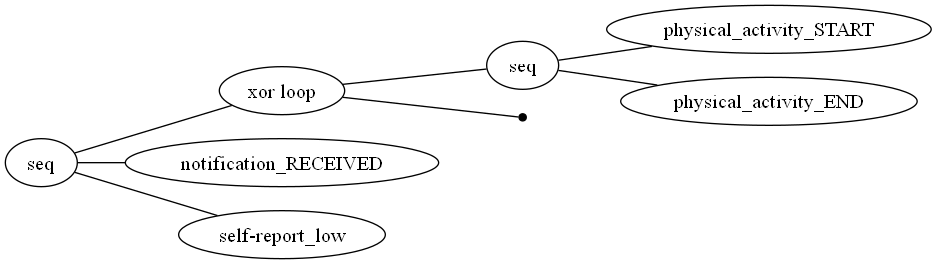

In [17]:
## Discover Process Model
# First get the process tree
process_tree = inductive_miner.apply(event_log)

# Visualize Process Tree
from pm4py.visualization.process_tree import visualizer as pt_visualizer
gviz_pt = pt_visualizer.apply(process_tree)
pt_visualizer.view(gviz_pt)



## Step 6: Converting to Petri Net

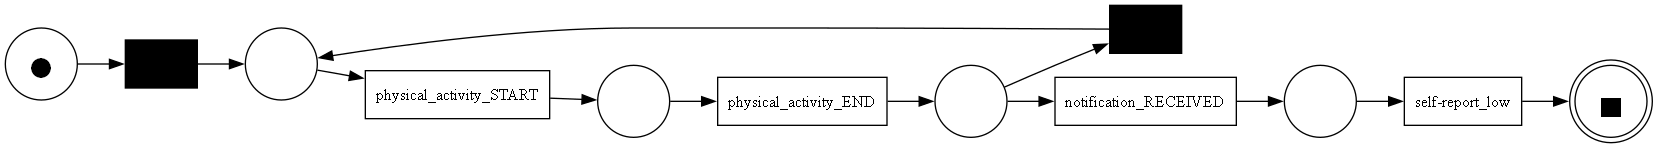

In [18]:
# Convert process tree to Petri net
from pm4py.objects.conversion.process_tree import converter as pt_converter
net, initial_marking, final_marking = pt_converter.apply(process_tree)

# Visualizing
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)